# 1D Sequence Regression Example
The following code demonstrates how to use the seqreg module on 1D data. This example is from the paper "[Nonintrusive heat flux quantification using acoustic emissions during pool boiling](https://www.sciencedirect.com/science/article/pii/S1359431123005872)." In this paper several models are created and compared for predicitng boiling heat flux from hydrophone data recording during transient experiments.  
  

* The model weights can also be downloaded [here](https://drive.google.com/file/d/1LvN9y9XAb-KlJ3bMWZ59WU0uRi686pXf/view?usp=sharing).

## Setup Collab:
First we need to install the packages needed for the tutorial.

In [ ]:
!pip install seqreg
!pip install scikit-learn==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
import gdown

## Let's start:


In [ ]:
# Load Module
import seqreg.seqreg as seqreg

#### Test Data on Pretrained Model

In [ ]:
# Download Testing Data
gdown.download('https://osf.io/r5hmz/download' , './HydRegTest.zip' , quiet=False)

!unzip ./HydRegTest.zip

Downloading...
From: https://osf.io/r5hmz/download
To: /content/HydRegTest.zip
100%|██████████| 12.5M/12.5M [00:00<00:00, 27.3MB/s]


Archive:  ./HydRegTest.zip
  inflating: 1D-HydReg_TestData/testdataset.csv  


In [ ]:
# Load Data
testfolder='./1D-HydReg_TestData'      # Define path to test folder

'''
LoadDataFromFolder Function
---------------------------
Inputs:
    * folderpath
    * xname
    * yname
    * tname
    * datatype: either "Value" or "txtFilePath" depending on data in x column of csv files
Outputs:
    * xds
    * yds
    * timeds
'''
xtestds,ytestds,timetestds=seqreg.LoadDataFromFolder(testfolder, "Sound","Heat Flux")

In [ ]:
# Prepare Data
seqlen, stride, dt = 4000,1000,0.01     # Define parameters

'''
PrepareData Function
----------------------
Inputs:
    * x
    * y
    * time
    * seqlen
    * stride
    * dt: Timestep for use in fft function
    * fft: (Boolean)
    * seqout: (Boolean) for if the y data should be a sequence
Outputs:
    * x1: numpy array
    * y1
    * t1
'''
xtest,ytest,timetest=seqreg.PrepareData(xtestds,ytestds,timetestds,seqlen,stride,dt,fft=True)

In [ ]:
# Download HydReg Model (You can directly download it directly from GitHub)
gdown.download('https://osf.io/mk2d4/download' , './HydReg.joblib' , quiet=False)

Downloading...
From: https://osf.io/mk2d4/download
To: /content/HydReg.joblib
100%|██████████| 567M/567M [00:19<00:00, 28.5MB/s]


'./HydReg.joblib'

In [ ]:
# Load Model
architecturename='HydReg'     # Name of model architecture
savedmodelpath="./HydReg.joblib"    # Path to pretrained saved weights or model

'''
Model Function
-----------------
Inputs:
    * modelname
    * savemodelpath
    * train: Boolean
    * xtrain:
    * ytrain
Outputs:
    * model
'''
model=seqreg.Model(architecturename,savedmodelpath,train=False)

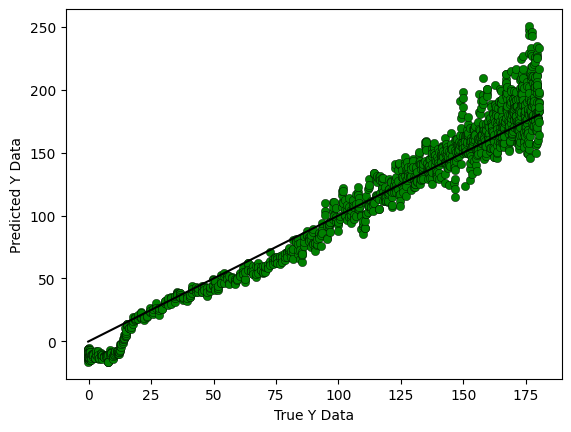

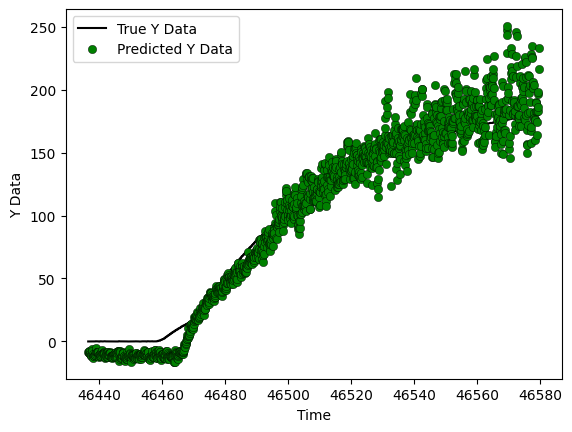

{'r2': 0.9502109956066538,
 'mse': 219.19793055858747,
 'mape': 11496.633789802427}

<Figure size 640x480 with 0 Axes>

In [ ]:
# Analyze
'''
Analyze Function
------------------
Inputs:
    * model
    * savepath
    * xtest
    * ytest
    * time
    * xname
    * yname
    * seqout: Boolean
    * showplot: Boolean
Outputs:
    * results: dictionary containing performance metrics
'''
seqreg.Analyze(model,"./Outputs",xtest,ytest,timetest)

#### Train on Your Own Data

In [ ]:
'''
# Only testing data is provided for this tutorial. For training on your own data the following code could be used:

# Load and Prepare Training Data
trainfolder='./TrainData'     # Folder containing training data
xtrainds,ytrainds,timetrainds=seqreg.LoadDataFromFolder(trainfolder,"Sound","Heat Flux")   # Load training data

seqlen,stride,dt=4000,1000,0.01     # Define parameters
xtrain,ytrain,timetrain=seqreg.PrepareData(xtrainds,ytrainds,timetrainds,seqlen,stride,dt,fft=True)    # Prepare data


# Define model for training
architecturename='HydReg'     # Name of model architecture
savemodelpath="./HydReg_custom.joblib"    # Specify path to save weights/ model

model=seqreg.Model('HydReg',savemodelpath,train=True, xtrain=xtrain,ytrain=ytrain)

# Analyze
seqreg.Analyze(model,"./",xtest,ytest,timetest)    # Test model performance on testing data
'''